# 1. EDA and Data cleaning

In [30]:
 import pandas as pd
import numpy as np

In [12]:
df=pd.read_csv ("C:/Users/USER/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
#Get the categorical summary statistics of the data
df.describe(exclude='number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [17]:
#Checking for the missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
#Check the target variable( to check imbalance)

df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'ChurnTarget'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

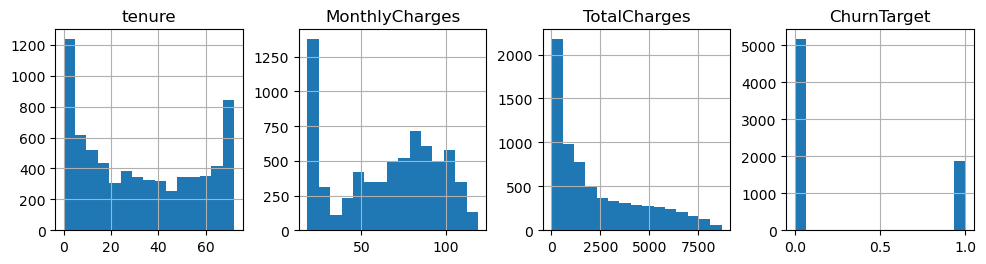

In [19]:
import numpy as np

# Replace empty strings in 'TotalCharges' with NaN and convert the column to numeric
df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

# Convert 'SeniorCitizen' column to string type
df['SeniorCitizen'] = df['SeniorCitizen'].astype('str')

# Create 'ChurnTarget' column based on 'Churn' column
df['ChurnTarget'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select numerical features and plot histograms
num_features = df.select_dtypes('number').columns
df[num_features].hist(bins=15, figsize=(15, 6), layout=(2, 5))



<function matplotlib.pyplot.show(close=None, block=None)>

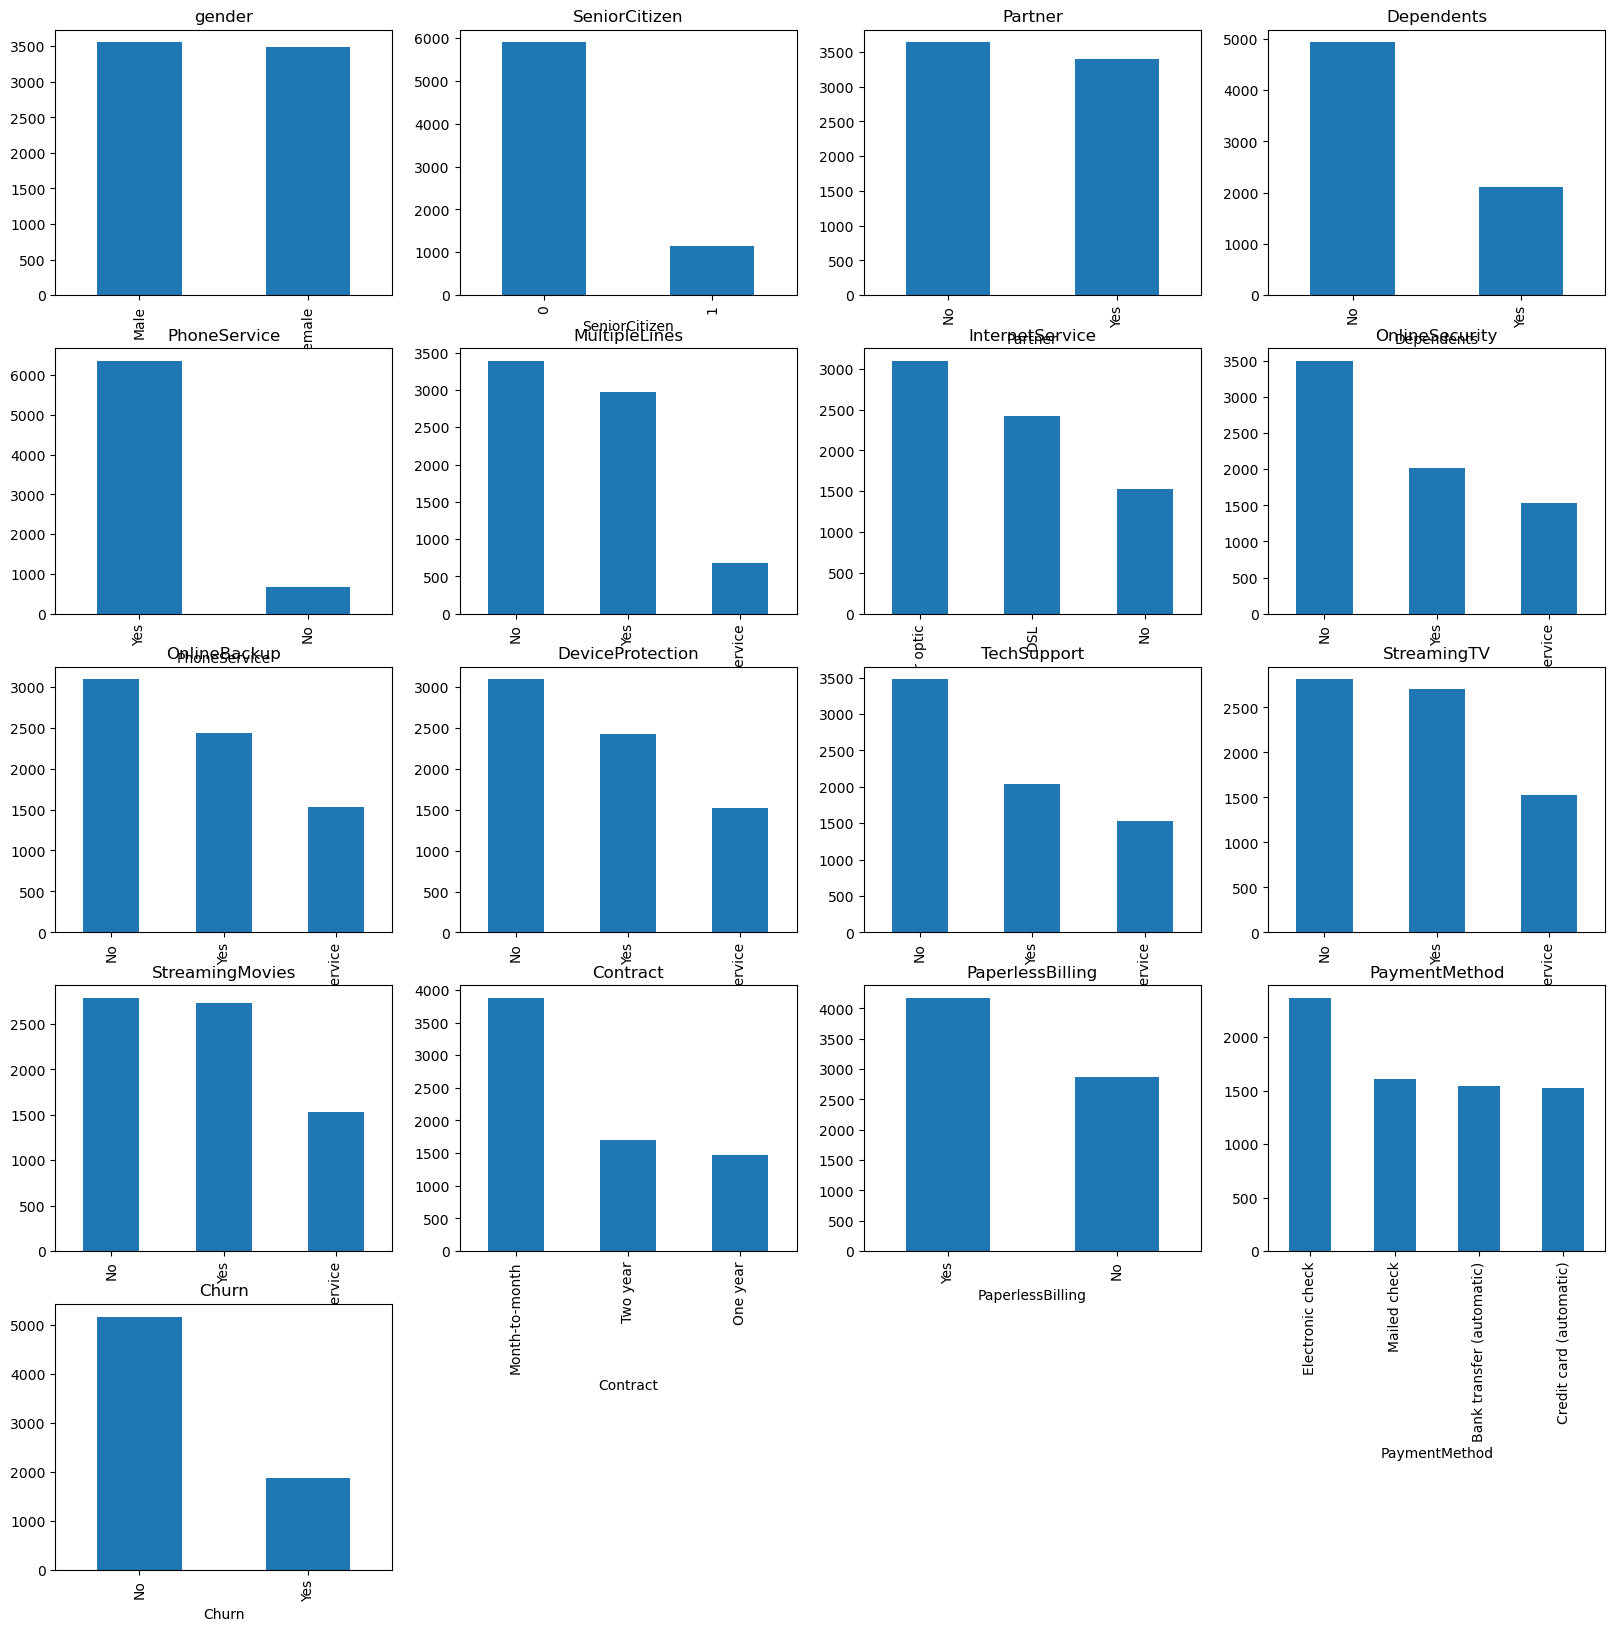

In [20]:
import matplotlib.pyplot as plt
#Plot distribution of categorical features
Cat_features =df.drop('customerID', axis=1).select_dtypes(include='object').columns
plt.figure(figsize=(20,20))
for i, col in enumerate(Cat_features, 1):
    plt.subplot(5, 4, i) 
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
plt.tight_layout
plt.show

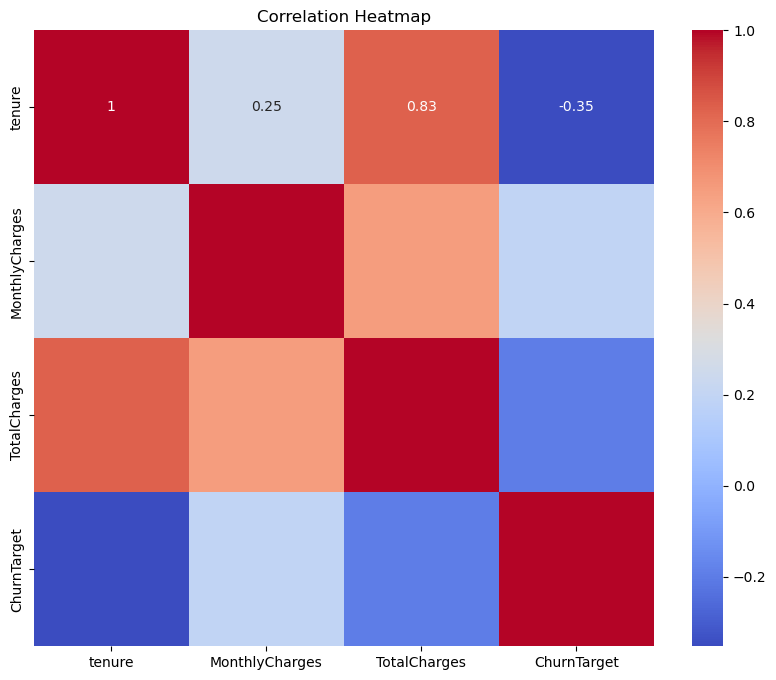

In [21]:
import seaborn as sns 

# Plot the correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm')  # Added period and optional arguments for clarity
plt.title('Correlation Heatmap')
plt.show()


<Axes: >

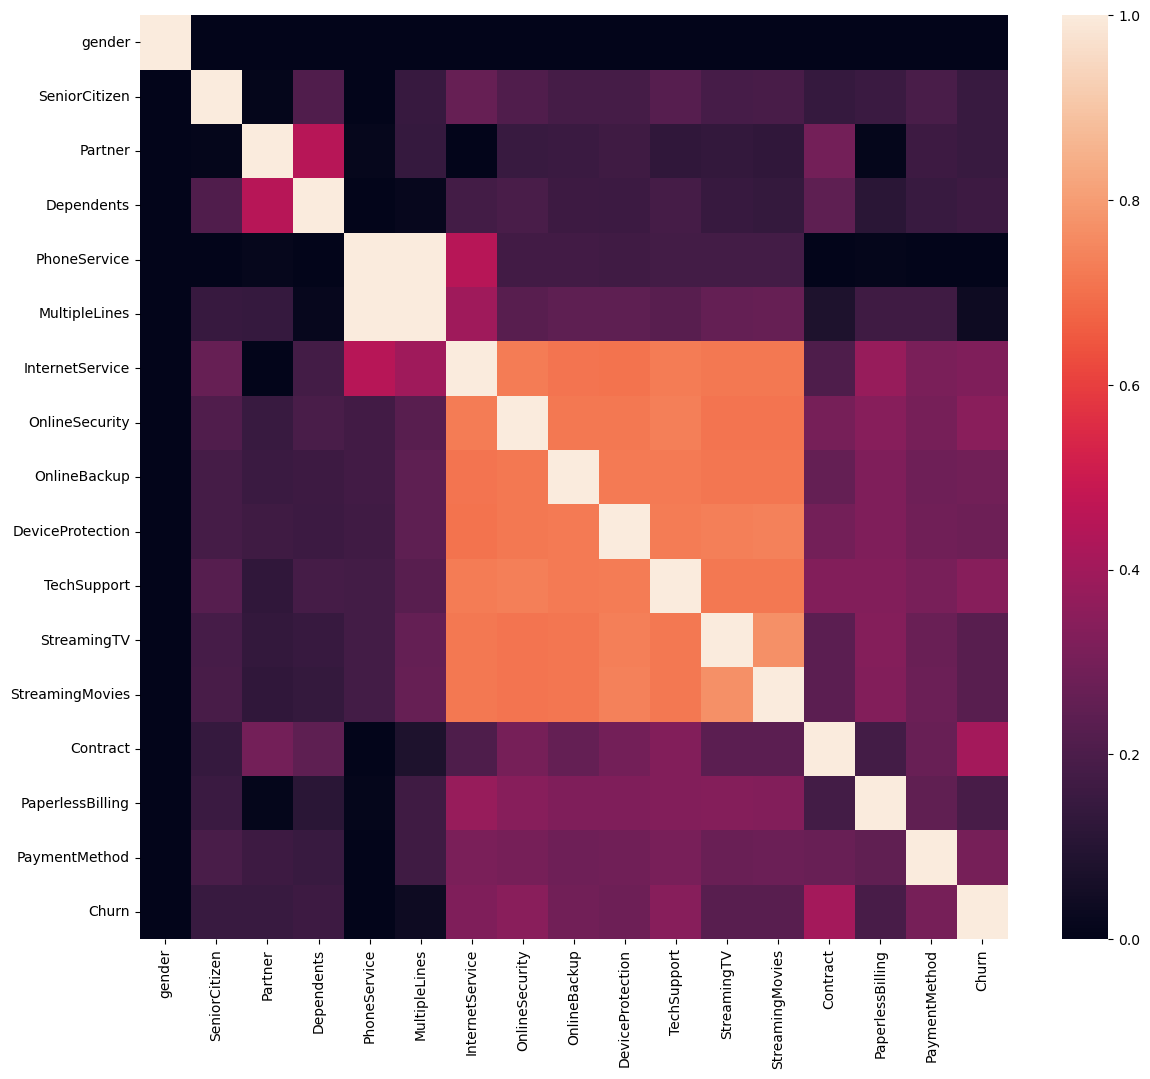

In [23]:
from dython.nominal import associations
#Calculate the cramers 'V' and correlation matrix
assoc= associations(df[Cat_features],nominal_columns='all', plot=False)
corr_matrix=assoc['corr']

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix)

## Feature Selection

In [32]:

# Define the target variable
target = 'ChurnTarget'

# Identify numerical features, excluding the target variable
num_features = df.select_dtypes(include=[np.number]).columns.drop(target)

# Calculate correlations with the target variable
correlations = df[num_features].corrwith(df[target])

# Set a threshold for feature selection
threshold = 0.3

# Select features with absolute correlation greater than the threshold
selected_num_features = correlations[abs(correlations) > threshold].index.tolist()

# Display selected features
print("Selected numerical features:", selected_num_features)


Selected numerical features: ['tenure']


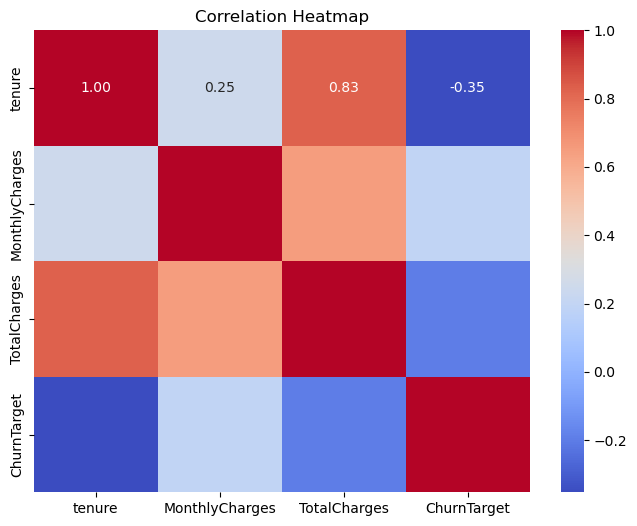

In [38]:
#First, import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df[num_features.tolist() + [target]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [42]:
# (Optional) 7. Basic modeling: Logistic Regression to predict churn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target for the model
X = df[selected_num_features]
y = df['Churn']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)



In [44]:
# Print evaluation results
print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Model Accuracy: 73.46%

Confusion Matrix:
[[1035    1]
 [ 373    0]]

Classification Report:
              precision    recall  f1-score   support

          No       0.74      1.00      0.85      1036
         Yes       0.00      0.00      0.00       373

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409



### Summary of the Model Results:

1. **Model Accuracy**: 
   - The logistic regression model achieved an accuracy of **73.46%**, meaning the model correctly predicted whether a customer churned or not in about 73% of the cases. However, accuracy alone can be misleading, especially with imbalanced classes.

2. **Confusion Matrix**:
   - **True Negatives (1035)**: The model correctly predicted that 1,035 customers did not churn.
   - **False Positives (1)**: The model incorrectly predicted that 1 customer would churn, but they did not.
   - **False Negatives (373)**: The model incorrectly predicted that 373 customers would not churn, but they actually did.
   - **True Positives (0)**: The model failed to correctly predict any churn cases.

3. **Classification Report**:
   - **Precision**: The precision for predicting `Yes` (churn) is **0.00**, meaning the model did not correctly predict any actual churn cases. This indicates an issue in identifying customers who churn.
   - **Recall**: The recall for `Yes` (churn) is **0.00**, which means the model failed to capture any actual churners, even though there were 373 of them.
   - **F1-Score**: The F1-score for churn (`Yes`) is **0.00**, showing that the model is not performing well for this class.
   - **Macro Average**: The macro average for precision, recall, and F1-score is significantly low, showing that the model struggles with class imbalance.
   - **Weighted Average**: The weighted average indicates that while the model performs better for the majority class (`No churn`), its performance on the minority class (`Yes churn`) drags down the overall score.

### Key Issues:
- **Imbalanced Data**: The dataset is highly imbalanced (more non-churn cases than churn cases). This is evident because the model performs well at predicting customers who did not churn but fails to identify those who did.
- **Zero Precision/Recall for Churn**: The model is unable to predict churners at all, which is a critical issue for this task since the goal is to identify customers at risk of churn.

### Recommendations:
1. **Address Class Imbalance**: Techniques such as oversampling the minority class (`Yes churn`), undersampling the majority class, or using techniques like SMOTE (Synthetic Minority Over-sampling Technique) should be employed.
2. **Use Different Models**: Try using more complex models like Random Forest, XGBoost, or ensemble methods, which may handle class imbalance better.
3. **Tune Model Hyperparameters**: Adjusting hyperparameters of the logistic regression model or trying other models may improve performance.
4. **Evaluation Metric**: Accuracy is not the best metric for imbalanced datasets. Focus on metrics like F1-score, precision, and recall for the minority class (churners).